# Classification

In [1]:
import sys
sys.path.append("C:\\Users\\User\\Vrije Universiteit Brussel\\Mehdi Feizpour - Halewijn's Thesis Project\\master thesis\\other")
sys.path.append("C:\\Users\\mfeizpou\\OneDrive - Vrije Universiteit Brussel\\Halewijn's Thesis Project\\master thesis\other")


import importlib
import my_functions as mf
import filepaths as fp
import color_maps as cm
import variables
mf = importlib.reload(mf)
fp = importlib.reload(fp)
cm = importlib.reload(cm)
variables = importlib.reload(variables)

import pandas as pd
import numpy as np
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter



from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.utils import check_array, check_X_y
import pickle
from sklearn.metrics import accuracy_score


In [2]:
def reload_libraries(): 
    import importlib
    import my_functions as mf
    import filepaths as fp
    import color_maps as cm
    import variables
    mf = importlib.reload(mf)
    fp = importlib.reload(fp)
    cm = importlib.reload(cm)
    variables = importlib.reload(variables)
    print('done')

In [3]:
data_filepath = fp.first_semester_data_filepath
image_filepath = fp.figure_filepath
filename = os.listdir(data_filepath)[0]
#read in the data
vector_df = pd.read_feather(data_filepath + '/' + filename).reset_index().rename({'index': 'measurement_index'}, axis = 1)
vector_df.iloc[:, 2:] = vector_df.iloc[:, 2:].astype('float64')

## PCA

In [16]:
#initialize the data that will be used
data = vector_df.iloc[:, 2:]
# Initialize SimpleImputer to replace NaN values with column means
imputer = SimpleImputer(strategy='mean')
# Fit and transform the data to replace NaN values with column means
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
# Do a standard scaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data.columns)
# Do a PCA
pca = PCA()
# Fit and transform the data using PCA
data_pca = pd.DataFrame(pca.fit_transform(data_scaled))
#stitch the labels to it
data_pca_labels = mf.stitch_labels(data_pca, vector_df.loc[:, 'Class'])

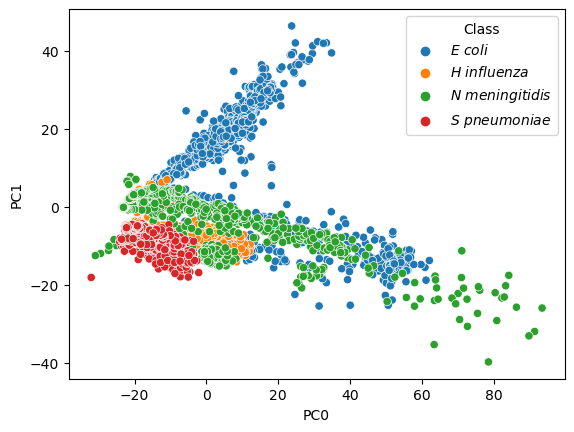

In [17]:
filename = 'pca.png'
sns.scatterplot(data = mf.replace_bacterial_names_for_plotting(data_pca_labels), x = 0, y = 1, hue = 'Class')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.savefig(fp.figure_filepath + '/' + filename)
plt.show()

## LDA

In [18]:
#initialize the data that will be used
data = vector_df.iloc[:, 2:]
#initialize the labels
labels = vector_df.loc[:, 'Class']
# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
# Initialize the Gaussian mixture model
gmm = GaussianMixture(n_components=4) 

#make the pipeline
lda_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis())
])

#GMM pipeline
gmm_pipeline = Pipeline([
    ('gmm', GaussianMixture(n_components=4))  # Adjust n_components for GMM
])

# Combined Pipeline
combined_pipeline = Pipeline([
    ('lda', lda_pipeline),
    ('gmm', gmm_pipeline)
])


#make the train_lda_df
train_lda_df = pd.DataFrame(lda_pipeline.fit_transform(X_train, y_train))
#predict the train labels
train_labels = gmm_pipeline.fit_predict(train_lda_df)
#make the test_lda_df
test_lda_df = pd.DataFrame(lda_pipeline.transform(X_test))
#make the test predictions
test_labels = gmm_pipeline.predict(test_lda_df)

# # Predict the labels using GMM
# predicted_labels_gmm = gmm.predict(data)

In [19]:
# #initialize the data that will be used
# data = vector_df.iloc[:, 2:]
# # Initialize SimpleImputer to replace NaN values with column means
# imputer = SimpleImputer(strategy='mean')
# # Fit and transform the data to replace NaN values with column means
# data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
# # Do a standard scaler
# scaler = StandardScaler()
# data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data.columns)
# # Initialize LDA with the number of components you want (e.g., 1 component)
# lda = LinearDiscriminantAnalysis(n_components=3)
# labels = vector_df.loc[:, 'Class']  # Corresponding class labels (0 and 1 in this example)
# Fit and transform the data using LDA

X, y = mf.get_X_y_from_vector_df(vector_df)

# Splitting the data into training and testing sets with a 70-30 split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

#fit_transform the lda_df
train_lda = pd.DataFrame(lda_pipeline.fit_transform(X_train, y_train))
#fit_transform the lda_df
test_lda = pd.DataFrame(lda_pipeline.transform(X_test))

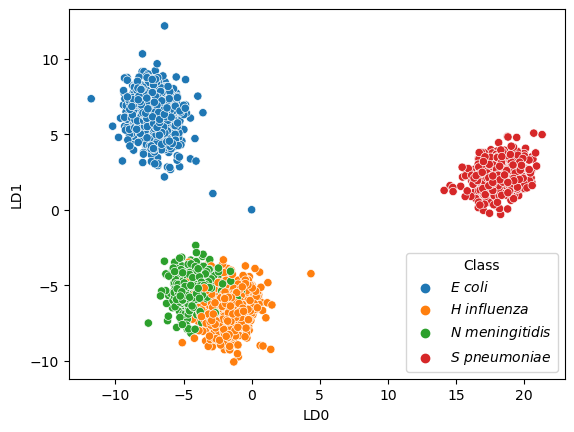

In [20]:
filename = 'LDA_2d.png'

#the train data
#stitch the labels to it
train_lda_labels = mf.stitch_labels(train_lda, y_train)
test_lda_labels = mf.stitch_labels(test_lda, y_test)

sns.scatterplot(data = mf.replace_bacterial_names_for_plotting(train_lda_labels), x = 0, y = 1, hue = 'Class')
plt.xlabel('LD0')
plt.ylabel('LD1')
#the test data

# plt.subplot(1,2,2)
# #stitch the labels to it
# test_lda_labels = stitch_labels(test_lda, y_test)
# sns.scatterplot(data = mf.replace_bacterial_names_for_plotting(test_lda_labels), x = 0, y = 1, hue = 'Class')
# plt.xlabel('LD0')
# plt.ylabel('LD1')
# plt.savefig(fp.figure_filepath + '/' + filename)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_21248\1647529597.py:18: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.pane.set_color('w');
C:\Users\User\AppData\Local\Temp\ipykernel_21248\1647529597.py:19: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.pane.set_color('w');
C:\Users\User\AppData\Local\Temp\ipykernel_21248\1647529597.py:20: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.pane.set_color('w');


test


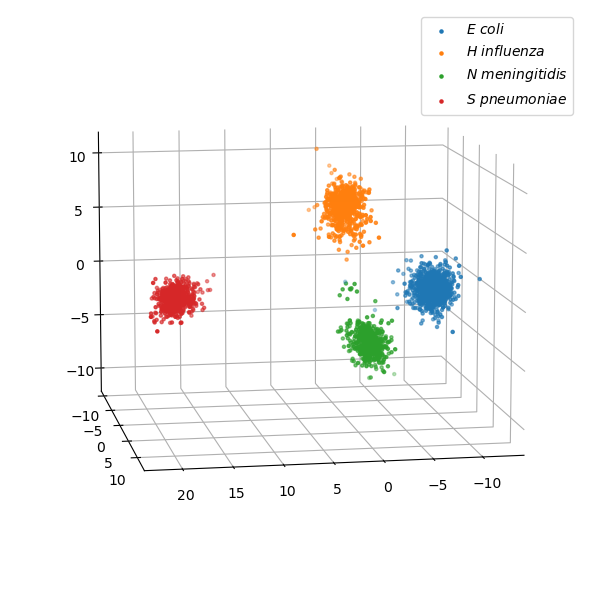

In [21]:
%matplotlib inline
add_LDA_labels = False
filename = 'LDA_3d'

#change the names of the classes for visualization 
train_lda_labels = mf.replace_bacterial_names_for_plotting(train_lda_labels)

# Generate random data for demonstration purposes
np.random.seed(0)
x = np.array(train_lda_labels.loc[:, 0])
y = np.array(train_lda_labels.loc[:, 1])
z = np.array(train_lda_labels.loc[:, 2])
colors = {'$\\it{E}$ $\\it{coli}$':'tab:blue', '$\\it{H}$ $\\it{influenza}$':'tab:orange', '$\\it{N}$ $\\it{meningitidis}$':'tab:green', '$\\it{S}$ $\\it{pneumoniae}$':'tab:red'}

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.w_xaxis.pane.set_color('w');
ax.w_yaxis.pane.set_color('w');
ax.w_zaxis.pane.set_color('w');

# Define shifted origins for X, Y, and Z axes
x_origin = 20
y_origin = 10
z_origin = -10



# Plot data points in 3D
#ax.scatter(x, y, z, c=data_lda_labels.loc[:, 'Class'].map(colors), marker='o')
    # Plot data points in 3D for each class separately and add legends
for label, color in colors.items():
    indices = train_lda_labels['Class'] == label
    ax.scatter(x[indices], y[indices], z[indices], c=color, label=label, marker='o', s = 5)

if add_LDA_labels == True:
    # get the color array
    color_array = list(cm.three_d_color_axis.values())
    
    # Define axis lengths
    axis_length = 8
    linewidth = 3
    # Plot X-axis with shifted origin
    ax.plot([x_origin, x_origin + axis_length], [y_origin, y_origin], [z_origin, z_origin], color=color_array[0], label='LDO', linewidth =linewidth)
    # Plot Y-axis with shifted origin
    ax.plot([x_origin, x_origin], [y_origin, y_origin + axis_length + 4], [z_origin, z_origin], color=color_array[1], label='LD1', linewidth = linewidth)
    # Plot Z-axis with shifted origin
    ax.plot([x_origin, x_origin], [y_origin, y_origin], [z_origin, z_origin + axis_length], color=color_array[2], label='LD2', linewidth = linewidth)
    

    print('adding labels')
    # Set labels and title
    ax.set_xlabel('LD0')
    ax.set_ylabel('LD1')
    ax.set_zlabel('LD2')
    filename += 'with_LDA_labels.png'
else: 
    print('test')
    filename += 'without_LDA_labels.png'
#ax.set_title('3D Scatter Plot')
ax.view_init(elev=10, azim=80)  # Change the elevation to 30 degrees and azimuth to 45 degrees
ax.legend()
plt.tight_layout()
plt.savefig(fp.figure_filepath + '/' + filename)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_21248\2170962284.py:17: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.pane.set_color('w');
C:\Users\User\AppData\Local\Temp\ipykernel_21248\2170962284.py:18: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.pane.set_color('w');
C:\Users\User\AppData\Local\Temp\ipykernel_21248\2170962284.py:19: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.pane.set_color('w');


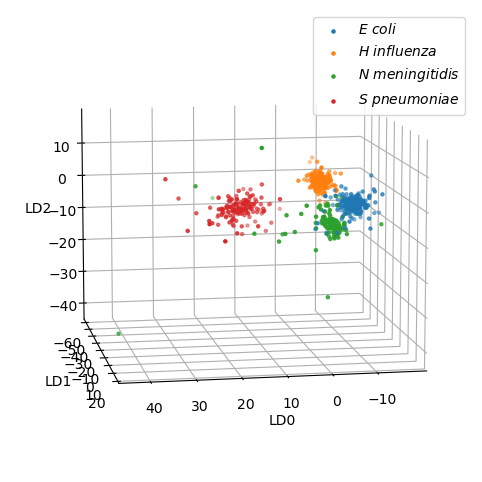

In [22]:
%matplotlib inline
filename = 'LDA_3d.png'

#change the names of the classes for visualization 
test_lda_labels = mf.replace_bacterial_names_for_plotting(test_lda_labels)

# Generate random data for demonstration purposes
np.random.seed(0)
x = np.array(test_lda_labels.loc[:, 0])
y = np.array(test_lda_labels.loc[:, 1])
z = np.array(test_lda_labels.loc[:, 2])
colors = {'$\\it{E}$ $\\it{coli}$':'tab:blue', '$\\it{H}$ $\\it{influenza}$':'tab:orange', '$\\it{N}$ $\\it{meningitidis}$':'tab:green', '$\\it{S}$ $\\it{pneumoniae}$':'tab:red'}

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.w_xaxis.pane.set_color('w');
ax.w_yaxis.pane.set_color('w');
ax.w_zaxis.pane.set_color('w');

# Plot data points in 3D for each class separately and add legends
for label, color in colors.items():
    indices = test_lda_labels['Class'] == label
    ax.scatter(x[indices], y[indices], z[indices], c=color, label=label, marker='o', s = 5)

# Plot data points in 3D
#ax.scatter(x, y, z, c=data_lda_labels.loc[:, 'Class'].map(colors), marker='o')

# Set labels and title
ax.set_xlabel('LD0')
ax.set_ylabel('LD1')
ax.set_zlabel('LD2')
#ax.set_title('3D Scatter Plot')
ax.view_init(elev=10, azim=80)  # Change the elevation to 30 degrees and azimuth to 45 degrees
ax.legend()
plt.savefig(fp.figure_filepath + '/' + filename)
plt.show()

### perform a gaussian mixture model

In [23]:
# # Initialize the Gaussian mixture model
# gmm = GaussianMixture(n_components=4) 
# #make the train_lda_df
# train_lda_df = pd.DataFrame(lda_pipeline.fit_transform(X_train, y_train))
# #predict the train labels
# train_predictions = gmm_pipeline.fit_predict(train_lda_df)
# #make the test_lda_df
# test_lda_df = pd.DataFrame(lda_pipeline.transform(X_test))
# #make the test predictions
# test_predictions = gmm_pipeline.predict(test_lda_df)

# #make the train_df
# train_df = pd.DataFrame(y_train).reset_index(drop = True)
# train_df.loc[:, 'predicted_Class numerical'] = pd.DataFrame(train_predictions)
# #make the test_df
# test_df = pd.DataFrame(y_test).reset_index(drop = True)
# test_df.loc[:, 'predicted_Class numerical'] = pd.DataFrame(test_predictions)

# #now convert the numerical output to the class names and vice verse
# label_map, reverse_label_map = get_label_map(train_df)
# train_df = transform_categorical_to_numerical(train_df, label_map, reverse_label_map)
# test_df = transform_categorical_to_numerical(test_df, label_map, reverse_label_map)


In [24]:
reload_libraries()
#make the train_lda_df
train_lda_df = pd.DataFrame(lda_pipeline.fit_transform(X_train.values, y_train))
#predict the train labels
train_predictions = gmm_pipeline.fit_predict(train_lda_df.values)
#make the test_lda_df
test_lda_df = pd.DataFrame(lda_pipeline.transform(X_test.values))
#make the test predictions
test_predictions = gmm_pipeline.predict(test_lda_df.values)

#save the model
#save the lda pipeline
mf.save_pickle(fp.model_filepath + '/' + 'lda_pipeline.pkl', lda_pipeline)
#save the gmm pipeline
mf.save_pickle(fp.model_filepath + '/' + 'gmm_pipeline.pkl', gmm_pipeline)

# Create a DataFrame to associate original labels with cluster assignments
train_df = pd.DataFrame({'true_class': y_train, 'gmm_predicted_class': train_predictions})
#create the test df
test_df = pd.DataFrame({'true_class': y_test, 'gmm_predicted_class': test_predictions})


#get the map based on majority voting
map = train_df.groupby('true_class').apply(mf.majority_vote).reset_index().rename({
    'true_class': 'gmm_class',
    0: 'gmm_class_numerical'}, axis = 1)
#save the map in order to use it in another file
map.to_csv(fp.intermediate_data_filepath + '/' + 'gmm_map.csv', index = False)

#now apply this majority map
class_train_df = mf.convert_GMM_to_class_labels(train_df, map)
class_test_df = mf.convert_GMM_to_class_labels(test_df, map)

done


#### Performance of Gaussiamn mixture model

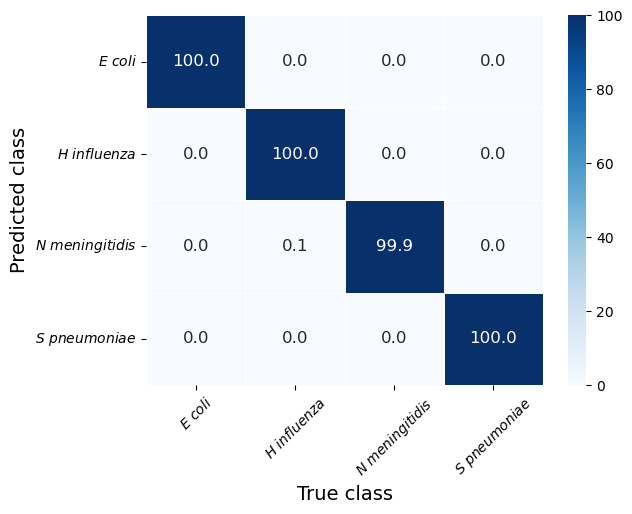

In [25]:
filename = 'lda_gmm_train_results.png'
mf.plot_confusion_matrix(class_train_df, map,filename, variables.fontsize)

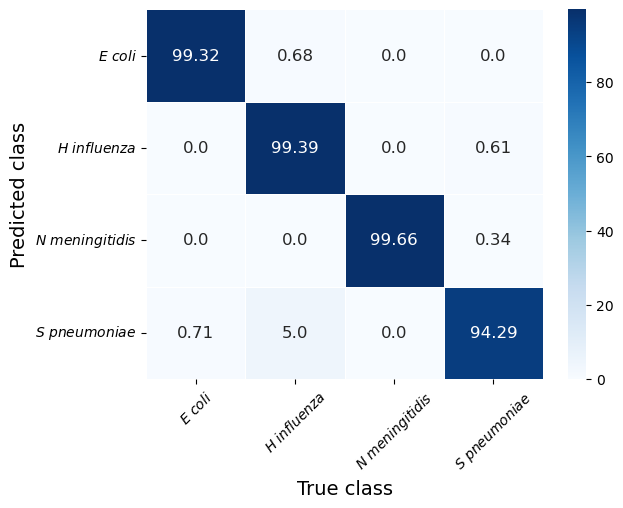

In [26]:
filename = 'lda_gmm_test_results.png'
mf.plot_confusion_matrix(class_test_df, map,filename, fontsize=variables.fontsize)

#### the learning curve

In [46]:
reload_libraries()
class_train_df, class_test_df = mf.train_model_and_get_results_for_learning_curve(vector_df)

train_accuracy, f1 = mf.get_accuracy_and_f1(class_train_df.loc[:, 'true_gmm_class'], class_train_df.loc[:, 'gmm_predicted_class'])
test_accuracy, f1 = mf.get_accuracy_and_f1(class_test_df.loc[:, 'true_gmm_class'], class_test_df.loc[:, 'gmm_predicted_class'])

done


In [109]:
reload_libraries()
def get_train_and_test_accuracy_for_learning_curve(X_train, X_test, y_traion, y_test, num_samples_in_subset): 
    #the ramining X_train and y_train we're going to subset and train on that
    #we select the number of samples that we want
    subset_X_train = X_train.sample(n = num_samples_in_subset)
    idx = subset_X_train.index.values
    subset_y_train = y_train[idx]
    class_train_df, class_test_df =mf.train_model_and_get_results_for_learning_curve(subset_X_train, X_test, subset_y_train, y_test)
    train_accuracy, f1 = mf.get_accuracy_and_f1(class_train_df.loc[:, 'true_gmm_class'], class_train_df.loc[:, 'gmm_predicted_class'])
    test_accuracy, f1 = mf.get_accuracy_and_f1(class_test_df.loc[:, 'true_gmm_class'], class_test_df.loc[:, 'gmm_predicted_class'])
    return train_accuracy, test_accuracy

done


In [130]:
import warnings
warnings.filterwarnings('ignore')
averaging_measurements = 5
X, y = mf.get_X_y_from_vector_df(vector_df)
#let's use 20 percent of the samples as our test set

num_samples_array = np.arange(1000, 2965, 100)
train_accuracy_array = []
test_accuracy_array = []
num_samples_full_array = []
for ii in range(averaging_measurements): 
    print(ii)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
    for num_samples_in_subset in num_samples_array: 
        train_accuracy, test_accuracy = get_train_and_test_accuracy_for_learning_curve(X_train, X_test, y_train, y_test, num_samples_in_subset)
        train_accuracy_array += [train_accuracy]
        test_accuracy_array += [test_accuracy]
        num_samples_full_array += [num_samples_in_subset]
    

0
1
2
3
4


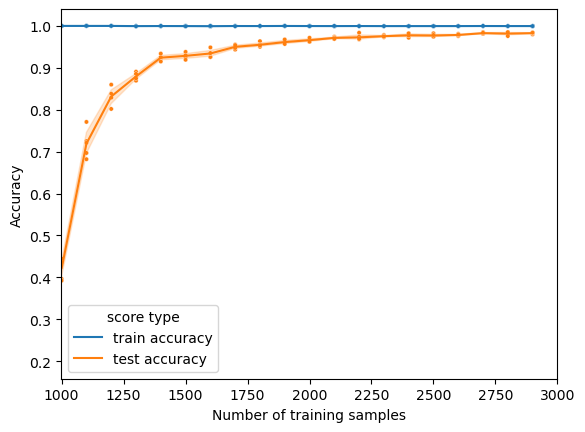

In [146]:
results_df = pd.DataFrame({'num_training_samples': num_samples_full_array, 
             'train accuracy': train_accuracy_array,
             'test accuracy': test_accuracy_array})
melted_df = pd.melt(results_df, id_vars=['num_training_samples'], 
                    value_vars=['train accuracy', 'test accuracy'], 
                    var_name='score type', value_name='accuracy')
sns.lineplot(data = melted_df, x= 'num_training_samples', y= 'accuracy', hue = 'score type')
sns.scatterplot(data = melted_df, x= 'num_training_samples', y= 'accuracy', hue = 'score type', legend = False,s = 10)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.xlim((999, 3000))
plt.show()

#### Visualizing the important components of the LDA

C:\Users\User\AppData\Local\Temp\ipykernel_11600\2797346162.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  loadings_df.loc[:, 'dimension'] = loadings_df.loc[:, 'dimension'].astype('int')


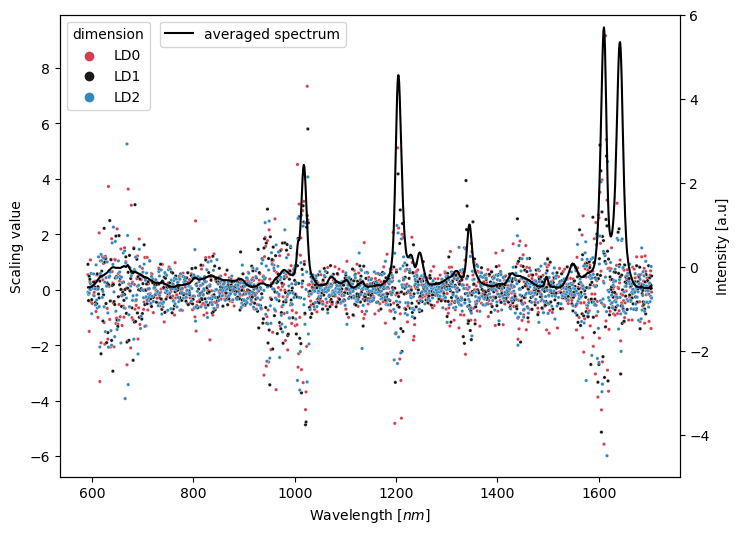

In [26]:
#make the loadings dataframe and plot it
loadings = lda_pipeline['lda'].scalings_
loadings_df = pd.DataFrame(loadings)
loadings_df.loc[:, 'wavelength'] = np.array(list(vector_df.columns[2:])).astype('float')

loadings_df = loadings_df.melt(id_vars = 'wavelength' , var_name = 'dimension',value_name='loading')
loadings_df.loc[:, 'dimension'] = loadings_df.loc[:, 'dimension'].astype('int')
# loadings_df = map_color(loadings_df, 'dimension', cm.three_d_color_axis)
loadings_df.loc[:, 'dimension'] = loadings_df.loc[:, 'dimension'].map({0: 'LD0', 1: 'LD1', 2: 'LD2'})
#plot it 
fig, ax1 = plt.subplots(figsize=(8, 6))
sns.scatterplot(data = loadings_df, x= 'wavelength', y = 'loading', hue = 'dimension',ax = ax1, s= 6, palette = cm.three_d_color_axis)
# Set the y-axis label for the first plot
ax1.set_ylabel('Scaling value')
ax1.set_xlabel('Wavenumber [$cm^{-1}$]')
ax1.set_xlabel('Wavelength [$nm$]')


#create the second plot
scale = 10
offset = 2

# Create a second y-axis for the second plot
ax2 = ax1.twinx()
# Shift the position of the second y-axis
#now overplot the averaged dataframe
melt_df = mf.get_melt_df(vector_df)
average_spectrum = melt_df.groupby(['wavelength'], as_index = False)['intensity'].mean()
average_spectrum =  mf.replace_bacterial_names_for_plotting(average_spectrum)
sns.lineplot(data = average_spectrum, x = 'wavelength', y = 'intensity',ax=ax2, c = 'black', label = 'averaged spectrum')
plt.legend(loc = 'upper left', bbox_to_anchor = (0.15, 1))
ax2.set_ylim(-5,6)
ax2.set_ylabel('Intensity [a.u]')

ax2.set_xlabel('wavenumber [$cm^{-1}$]')
filename = 'LDA_loadings.png'
plt.savefig(fp.figure_filepath + '/' + filename)
plt.show()

#### anomaly detection

In [175]:
# Read the vector data
classes = vector_df['Class'].unique()
threshold_array = []
for class_ in classes: 
    threshold = mf.get_mahalanobis_distance_threshold(lda_pipeline, vector_df, class_, 5)
    threshold_array += [threshold]

threshold_df = pd.DataFrame({'Class': classes, 
             'threshold': threshold_array})
threshold_df.to_csv(fp.intermediate_data_filepath + '/' + 'threshold_distance.csv', index = False)

### Perform a Gaussian Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB
X, y = mf.get_X_y_from_vector_df(vector_df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

with open(fp.model_filepath + '/' + 'lda_pipeline.pkl', 'rb') as lda_file:
    lda_pipeline = pickle.load(lda_file)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

NameError: name 'y_pred' is not defined

In [18]:
X_train_lda = lda_pipeline.transform(X_train)
X_test_lda = lda_pipeline.transform(X_test)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_lda, y_train)
y_pred = nb_classifier.predict(X_test_lda)
probabilities = nb_classifier.predict_proba(X_test_lda)
df = pd.DataFrame(probabilities)
(df[0] + df[1] + df[2] + df[3]).min()

0.9999999999999946

In [44]:
testing_data_path = fp.second_semester_directory + '/' + 'raman_prediction' + '/' + 'testing_datafolder'
df = pd.read_csv(testing_data_path + '/' + 'ecoli_df.csv')
X, y = mf.get_X_y_from_vector_df(mf.get_vector_df(df, 'intensity'))
lda_transformed_data = lda_pipeline.transform(X.values)

C:\Users\User\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [45]:
nb_classifier.predict_joint_log_proba(lda_transformed_data)

array([[  -4.09570127,  -87.57811799, -120.74676155, -316.69812993]])

In [ ]:
from scipy.stats import multivariate_normal

def calculate_class_probability(data_point, class_means, class_variances, class_priors):
    class_probabilities = []
    
    # Iterate over each class
    for i in range(len(class_means)):
        mean = class_means[i]
        variance = class_variances[i]
        prior = class_priors[i]
        
        # Compute the likelihood using the probability density function of multivariate Gaussian
        likelihood = multivariate_normal.pdf(data_point, mean=mean, cov=variance)
        
        # Multiply likelihood by prior probability
        class_probability = likelihood * prior
        class_probabilities.append(class_probability)
    
    # Normalize probabilities
    sum_probabilities = sum(class_probabilities)
    normalized_probabilities = [prob / sum_probabilities for prob in class_probabilities]
    
    return normalized_probabilities

# Example usage:
data_point = lda_transformed_data  # Replace with your actual data point
class_means = [...]           # List of mean vectors for each class
class_variances = [...]       # List of covariance matrices for each class
class_priors = [...]          # List of prior probabilities for each class

# Calculate class probabilities for the data point
class_probabilities = calculate_class_probability(data_point, class_means, class_variances, class_priors)
print("Class Probabilities:", class_probabilities)


In [34]:
nb_classifier.priors

In [ ]:
scale = 10
elt_df = mf.get_melt_df(vector_df)
data = mf.replace_bacterial_names_for_plotting(melt_df)

sns.lineplot(data = data, x = 'wavelength', y = 'intensity', hue = 'Class', errorbar=('se', scale))

### perform logisitc regression on the coordinates for probability calibration

In [46]:
from sklearn.naive_bayes import GaussianNB
X, y = mf.get_X_y_from_vector_df(vector_df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

with open(fp.model_filepath + '/' + 'lda_pipeline.pkl', 'rb') as lda_file:
    lda_pipeline = pickle.load(lda_file)

X_train_lda = lda_pipeline.transform(X_train)
X_test_lda = lda_pipeline.transform(X_test)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.calibration import calibration_curve


# Initialize multiclass logistic regression model
log_reg_model = LogisticRegression(multi_class='ovr', max_iter=1000)

# Train the model
log_reg_model.fit(X_train_lda, y_train)

# Predictions
y_pred = log_reg_model.predict(X_test_lda)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

log_reg_model.predict_proba(X_test_lda)[:, 1]

array([2.33798061e-04, 1.31733842e-06, 9.99909510e-01, 2.59521648e-04,
       3.80781766e-05, 9.99882441e-01, 3.98149921e-03, 7.29730907e-06,
       9.99977567e-01, 7.94345996e-04, 1.06960185e-04, 4.38563845e-06,
       1.61212354e-05, 9.99716562e-01, 2.88265039e-02, 9.99747625e-01,
       4.20013221e-03, 9.93229849e-01, 4.63369366e-06, 1.05220737e-04,
       9.99857820e-01, 6.51393795e-06, 7.04987573e-05, 1.71534773e-06,
       5.55692701e-05, 2.88741873e-08, 1.12226813e-01, 3.05961477e-03,
       9.99105717e-01, 3.41658330e-06, 2.57229689e-13, 6.53607742e-07,
       3.58345895e-06, 2.05214346e-07, 4.89679915e-06, 3.99655647e-07,
       4.78516638e-07, 3.05656971e-06, 1.14246370e-03, 9.99788777e-01,
       3.62240887e-05, 3.99689932e-05, 1.53599292e-05, 2.82149394e-05,
       4.99840560e-01, 2.69633131e-05, 1.32936717e-09, 4.38196259e-07,
       3.85476074e-03, 5.64012532e-04, 7.65379882e-06, 9.99264242e-01,
       5.27126924e-12, 3.40923403e-06, 2.14200999e-05, 2.92703964e-07,
      

In [68]:
y_test == log_reg_model.classes_[0]

3113    False
1068     True
2046    False
787      True
798      True
        ...  
1952    False
596      True
1684    False
1667    False
296      True
Name: Class, Length: 742, dtype: bool

(array([595.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 147.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

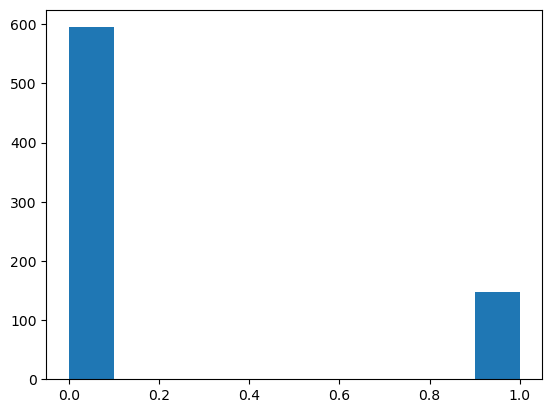

In [74]:
plt.hist(prob_pos)